   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

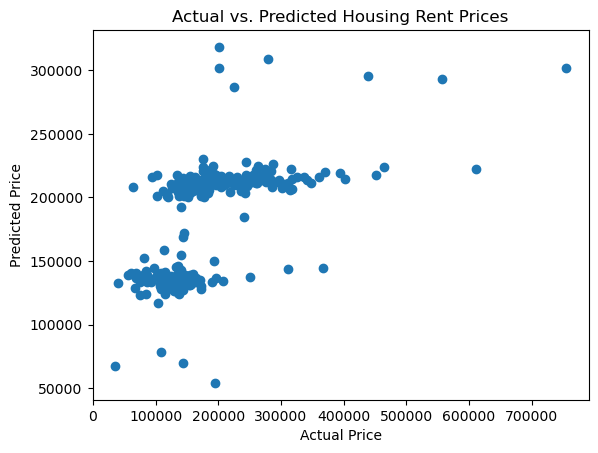

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Display the first few rows of the dataset
print(train_data.head())

# Selecting features and target variable
X = train_data[['LotArea', 'BedroomAbvGr', 'FullBath']]
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Rent Prices")
plt.show()


In [12]:
# LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Selecting features and target variable
selected_features = ['LotArea', 'BedroomAbvGr', 'FullBath', 'Neighborhood', 'SalePrice']
train_data = train_data[selected_features]

# Handling missing values
train_data.dropna(inplace=True)

# One-hot encoding for 'Neighborhood'
encoder = OneHotEncoder(sparse=False)
neighborhood_encoded = encoder.fit_transform(train_data[['Neighborhood']])
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(['Neighborhood']))

# Concatenating one-hot encoded features with original dataframe
train_data = pd.concat([train_data.drop('Neighborhood', axis=1), neighborhood_encoded_df], axis=1)

# Selecting features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# Print coefficients
print("\nCoefficients:", model.coef_)

# Print intercept
print("Intercept:", model.intercept_)

# Print feature names
print("Feature names:", X.columns.tolist())



Mean Squared Error: 2700800415.5771837
R-squared: 0.6478897581896161

Coefficients: [ 1.18628459e+00  6.26305742e+03  3.66597557e+04  7.11984635e+03
 -2.25449564e+04 -5.52475024e+04 -3.79429605e+04  6.18294911e+03
  1.07758684e+04  2.76615963e+04 -4.81900394e+04 -5.04093048e+03
 -5.55886145e+04 -5.69388561e+04 -2.33645312e+04 -2.35391135e+04
 -4.47606026e+04 -9.64398158e+03  1.11838086e+05  1.10335796e+05
 -4.23194125e+04 -4.43399603e+04 -3.47354675e+04 -7.20207307e+03
  3.12732616e+04  1.14629145e+05  2.06446068e+04  7.09378460e+04]
Intercept: 95816.91597225246
Feature names: ['LotArea', 'BedroomAbvGr', 'FullBath', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge

/opt/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
# LINEAR REGRESSION WITH WEIRD FEATURES
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Selecting features and target variable
selected_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'LotArea', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'BedroomAbvGr', 'SalePrice']
train_data = train_data[selected_features]

# Handling missing values
train_data.dropna(inplace=True)

# Selecting features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1642948880.934066
R-squared: 0.7858045620804737


In [71]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Selecting features and target variable
selected_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']
train_data = train_data[selected_features]

# Handling missing values
train_data.dropna(inplace=True)

# Selecting features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1667657527.1633682
R-squared: 0.7825832328225146


In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Selecting numerical features and target variable
numerical_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']
train_data = train_data[numerical_features]

# Handling missing values
train_data.dropna(inplace=True)

# Selecting features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1667657527.1633682
R-squared: 0.7825832328225146


In [73]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Selecting features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'BedroomAbvGr']]
y = train_data['SalePrice']

# Handling missing values (impute with mean)
X.fillna(X.mean(), inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Polynomial Regression):", mse)
print("R-squared (Polynomial Regression):", r2)


Mean Squared Error (Polynomial Regression): 1034033187.9855092
R-squared (Polynomial Regression): 0.8651904547401627


/tmp/ipykernel_2400070/3029878460.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# One-hot encoding for 'Neighborhood'
encoder = OneHotEncoder(sparse=False)
neighborhood_encoded = encoder.fit_transform(train_data[['Neighborhood']])
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(['Neighborhood']))

# Concatenating one-hot encoded features with original dataframe
train_data = pd.concat([train_data.drop('Neighborhood', axis=1), neighborhood_encoded_df], axis=1)

# Selecting features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'BedroomAbvGr'] + list(neighborhood_encoded_df.columns)]
y = train_data['SalePrice']

# Handling missing values (impute with mean)
X.fillna(X.mean(), inplace=True)

# Define the ColumnTransformer for one-hot encoding
categorical_features = ['Neighborhood']
categorical_transformer = OneHotEncoder(drop='first')

# Apply ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

# Preprocess the data
X_encoded = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Polynomial Regression with Neighborhood):", mse)
print("R-squared (Polynomial Regression with Neighborhood):", r2)


/opt/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_2400070/1430412396.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


ValueError: A given column is not a column of the dataframe

In [74]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('Kaggle comp files/train.csv')

# Selecting features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'BedroomAbvGr']]
y = train_data['SalePrice']

# Handling missing values (impute with mean)
X.fillna(X.mean(), inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Polynomial Regression):", mse)
print("R-squared (Polynomial Regression):", r2)


Mean Squared Error (Polynomial Regression): 1034033187.9855092
R-squared (Polynomial Regression): 0.8651904547401627


/tmp/ipykernel_2400070/3029878460.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


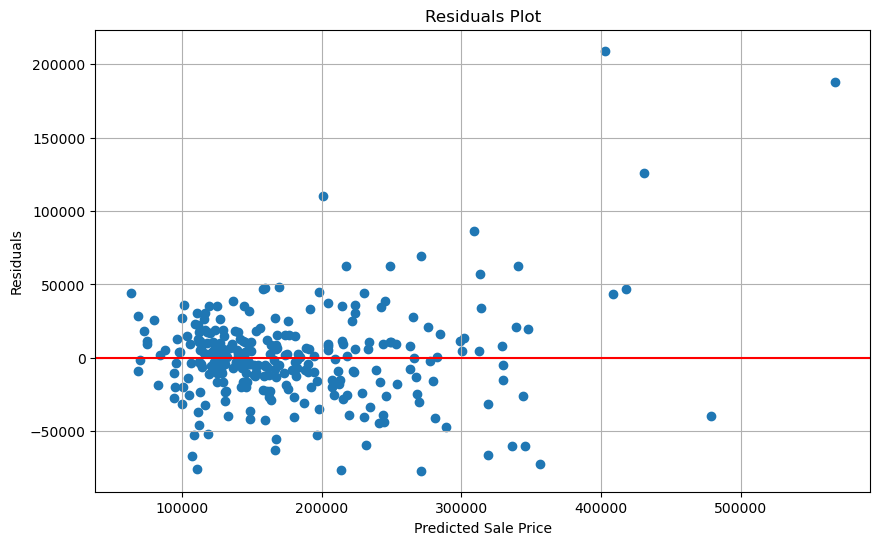

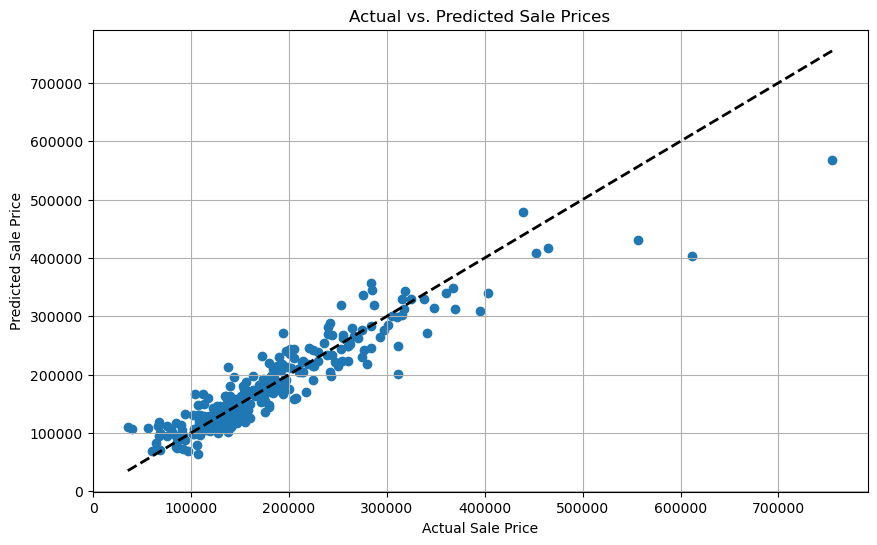

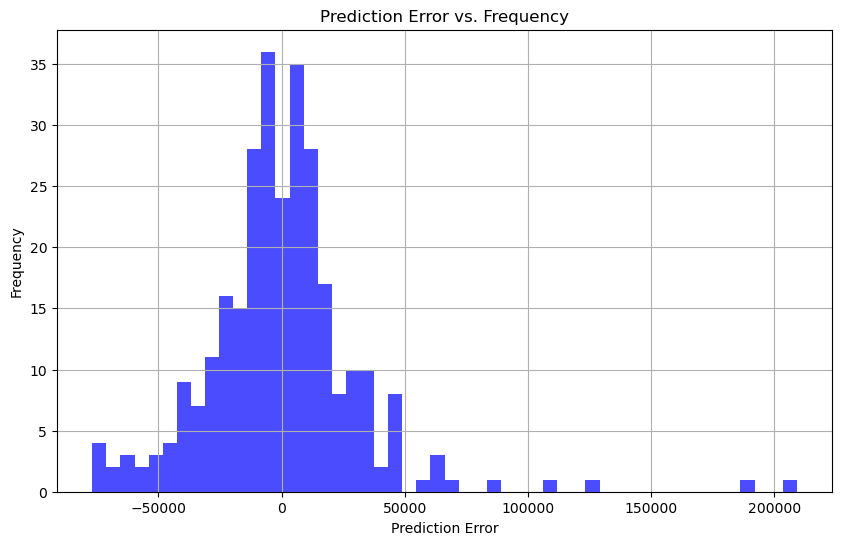

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals against predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.grid(True)
plt.show()

# Calculate prediction errors
prediction_errors = y_test - y_pred

# Plotting prediction error vs. frequency
plt.figure(figsize=(10, 6))
plt.hist(prediction_errors, bins=50, color='blue', alpha=0.7)
plt.title('Prediction Error vs. Frequency')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [67]:
from sklearn.ensemble import RandomForestRegressor

# Selecting features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'BedroomAbvGr']]
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (not required for Random Forest)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Random Forest Regression):", mse)
print("R-squared (Random Forest Regression):", r2)


Mean Squared Error (Random Forest Regression): 890220973.82192
R-squared (Random Forest Regression): 0.8839396200662523


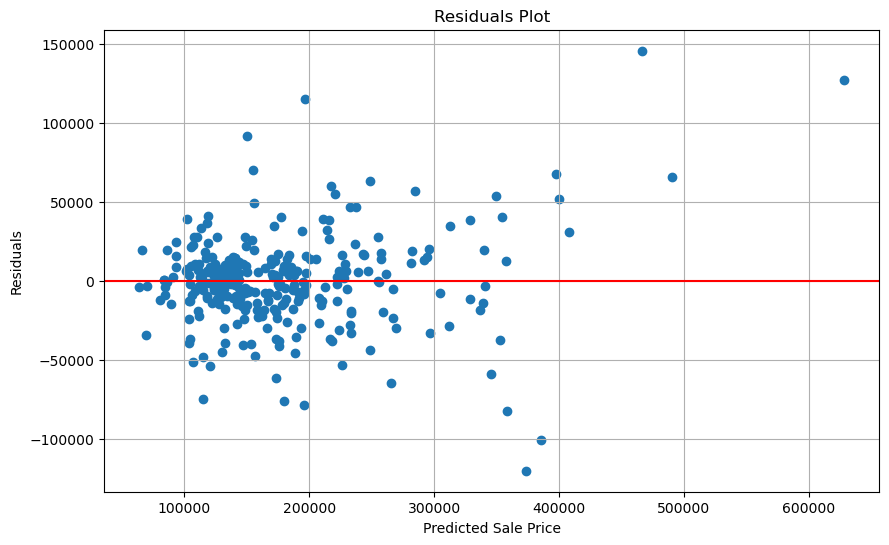

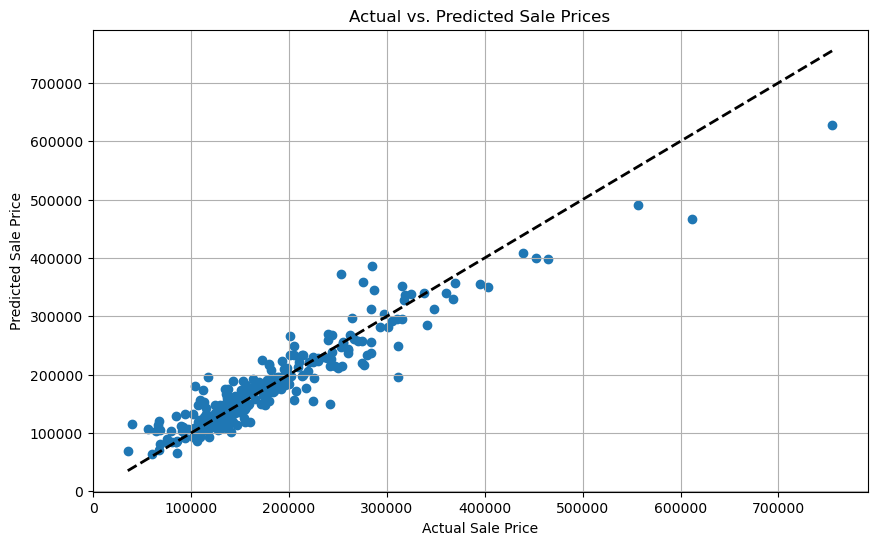

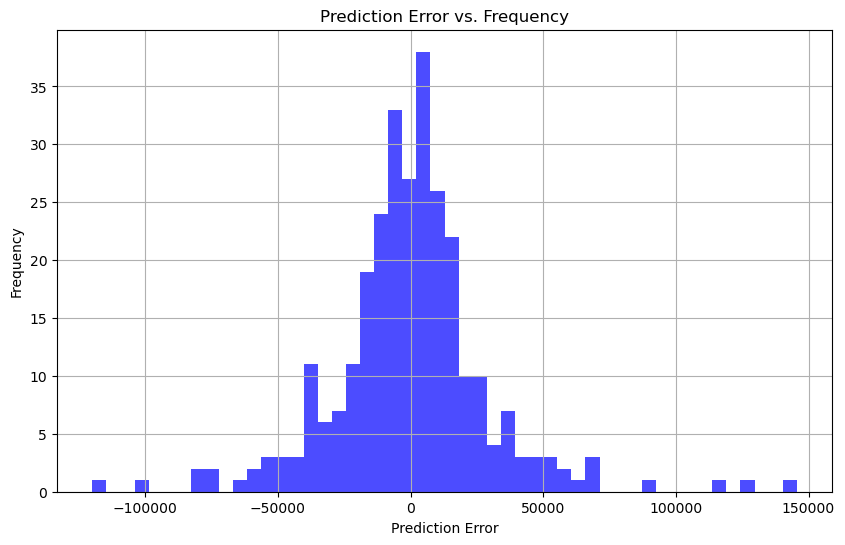

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals against predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.grid(True)
plt.show()

# Plotting prediction error vs. frequency
prediction_errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(prediction_errors, bins=50, color='blue', alpha=0.7)
plt.title('Prediction Error vs. Frequency')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
